In [67]:
import pandas as pd
import streamlit as st
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler


In [68]:
#Importando os dados
data = pd.read_csv('datasets/kc_house_data.csv' )

# Análise Exploratória dos Dados


In [69]:

def Map_Var_DF (features, df):
  #Criando um dicionário para receber as variáveis
  dict_var = {"feature": [],
              "Tipo": [],
              "Categórico": [],
              "Binário": [],
              "Qtd var unico": [],
              "Min": [],
              "Max": [],
              "% Qtd de Nulos": []}

  #Criando um loop a partir das features
  for feature in features:

    #Armazenando o nome da feature
    dict_var['feature'].append(feature)

    #Armazenando o tipo da variável
    dict_var['Tipo'].append(df[feature].dtypes)

    #Armazenando a quantidade de valores nulos
    dict_var['% Qtd de Nulos'].append(round(df[feature].isnull().sum() / df.shape[0],4))

    if ((df[feature].dtype == "O")):

      #Atribuindo o valor 1 se a variável for categórica
      dict_var['Categórico'].append(1)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      #Armazenando os valores mínimos
      dict_var['Min'].append("N/A")

      #Armazenando os valores máximos
      dict_var['Max'].append("N/A")

      if (df[feature].nunique() == 2):

        #Atribuindo o valor 1 se a variável for binária
        dict_var['Binário'].append(1)
        
      else:

        #Atribuindo o valor 0 se a variável não for binária
        dict_var['Binário'].append(0)

    else:

      #Atribuindo o valor 0 se a variável não for categórica
      dict_var['Categórico'].append(0)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      if (df[feature].nunique() == 2):

        #Atribuindo o valor 1 se a variável for binária
        dict_var['Binário'].append(1)
        
      else:

        #Atribuindo o valor 0 se a variável não for binária
        dict_var['Binário'].append(0)

      #Armazenando os valores mínimos
      dict_var['Min'].append(df[feature].min())

      #Armazenando os valores máximos
      dict_var['Max'].append(df[feature].max())
      
  #Transformando o dicionário em dataframe
  df_var = pd.DataFrame.from_dict(data = dict_var)

  #Imprimindo o dataframe
  return df_var

In [70]:
#Armazenando as features
features = data.columns.to_list()

#Armazenando as informações das variáveis
data_var = Map_Var_DF(features = features, df = data)

#Imprimindo o dataframe
data_var

,feature,Tipo,Categórico,Binário,Qtd var unico,Min,Max,% Qtd de Nulos
0,id,int64,0,0,21436,1000102,9900000190,0.0000
1,date,object,1,0,372,N/A,N/A,0.0000
2,price,float64,0,0,4028,75000.0,7700000.0,0.0000
3,bedrooms,int64,0,0,13,0,33,0.0000
4,bathrooms,float64,0,0,30,0.0,8.0,0.0000
5,sqft_living,int64,0,0,1038,290,13540,0.0000
6,sqft_lot,int64,0,0,9782,520,1651359,0.0000
7,floors,float64,0,0,6,1.0,3.5,0.0000
8,waterfront,int64,0,1,2,0,1,0.0000
9,view,int64,0,0,5,0,4,0.0000


In [71]:
#Armazenando as features numéricas
num_feature = data_var['feature'].loc[ (data_var['Tipo'] == 'float64') | (data_var['Tipo'] == 'int64') ].to_list()

# Tratamento de outliers

Plotar um gráfico de boxplot para avaliar a presença de outliers.


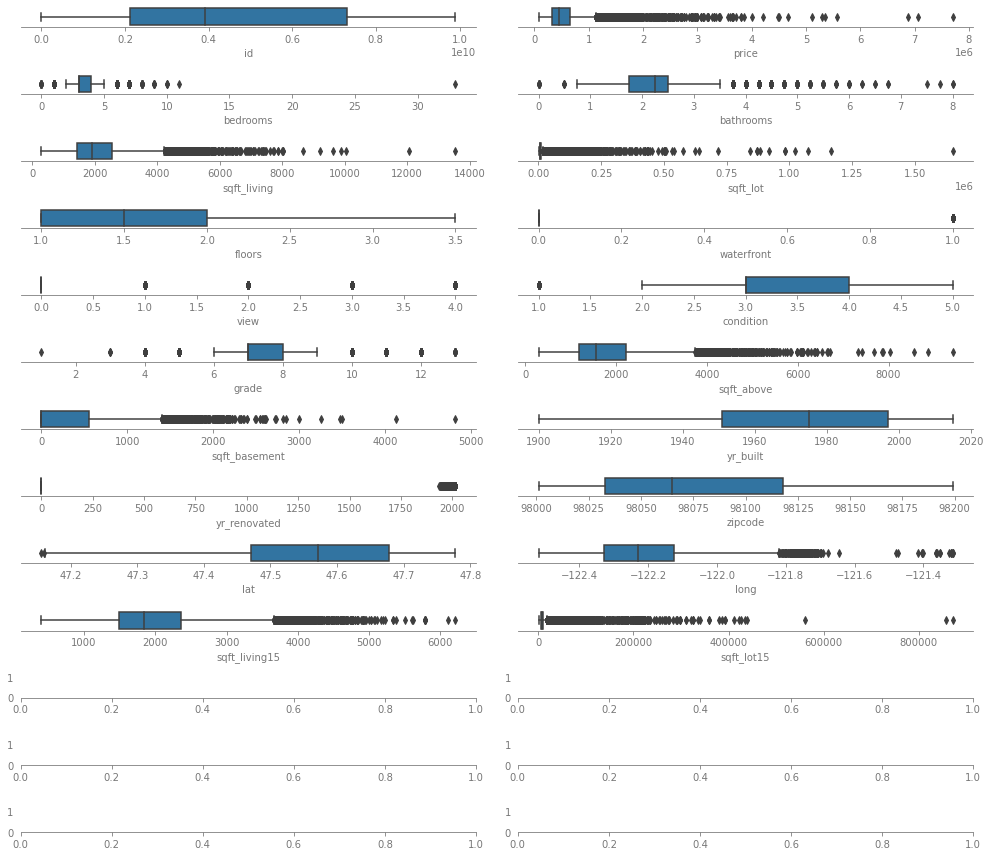

In [36]:
#Contador
cont_x = 0
cont_y = 0

#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False,
             'axes.spines.left': False, 
             'ytick.left': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12
             }

#Aplicando os parâmetros no matplotlib/seaborn
with plt.rc_context(rc_params):

  #Instanciando a figure e axes
  fig, ax = plt.subplots(nrows = 13, ncols = 2, figsize = (14,12) )

  #Rodando loop entre as features numéricas
  for feature in num_feature:

    #Criando o Box Plot para as features
    sns.boxplot(x = feature, data = data, ax = ax[cont_x,cont_y])

    #Atualizando os valores dos contadores para o axes
    if cont_y == 1:
      cont_x = cont_x + 1
      cont_y = 0

    else :
      cont_y = cont_y + 1

  #Imprimindo os gráficos
  fig.tight_layout()

In [72]:
# zipmde agroupa a coluna feature do dataframe por zipcode e calcula a media se function == mn e a mediana se function == md
def zipmdme ( data, function, feature ):
    if (function == 'mn'):
        dgroup = data[[feature, 'zipcode']].groupby('zipcode').mean().reset_index()
        dgroup.columns = ['zipcode',  'zipcode mean '+feature]
    if (function == 'md'):
        dgroup = data[[feature, 'zipcode']].groupby('zipcode').median().reset_index()
        dgroup.columns = ['zipcode',  'zipcode median '+feature]
        
    return dgroup

In [73]:
# Analise e criaçao de novas features do dataset
def set_feature ( data ):

    # Criacao da variavel preco por metro quadrado
    data['price_m2'] = data['price'] / data['sqft_lot']

   # statistics descriptive
    # seleciona as colunas do tipo float ou int e calcula estatisticas criando dataframes
    num_attributes = data.select_dtypes(include=['float64', 'int64'])
    num_attributes = num_attributes.drop(['lat', 'long'], axis=1)

    # Criacao de estatistica das variaveis numericas do dataframe
    media = pd.DataFrame(num_attributes.apply(np.mean))
    mediana = pd.DataFrame(num_attributes.apply(np.median))
    std = pd.DataFrame(num_attributes.apply(np.std))
    max_ = pd.DataFrame(num_attributes.apply(np.max))
    min_ = pd.DataFrame(num_attributes.apply(np.min))

    # concatena os dataframes criados com as estatisticas
    statist = pd.concat([max_, min_, media, mediana, std], axis=1).reset_index()
    statist.columns = ['attributes', 'max', 'min', 'media', 'mediana', 'std']
    
    #agroupa a coluna price por zipcode e calcula a media por zipcode 
    zmnprice = zipmdme(data, 'mn', 'price')

    #agroupa a coluna price por zipcode e calcula a mediana por zipcode 
    zmdprice = zipmdme(data, 'md', 'price')

    #agroupa a coluna sqft_living por zipcode e calcula a mediana por zipcode 
    zmdsqft_liv = zipmdme(data, 'md', 'sqft_living')

    #agroupa a coluna floors por zipcode e calcula a mediana por zipcode 
    zmdfloors = zipmdme(data, 'md', 'floors')

    #agroupa a coluna grade por zipcode e calcula a mediana por zipcode 
    zmdgrade = zipmdme(data, 'md', 'grade')


    # zprice = pd.merge(zmnprice, zmdprice, on = 'zipcode', how = 'inner')
    # zprice['relative difference'] = -100*(zprice['zipcode median price'] - zprice['zipcode mean price']) / ((zprice['zipcode mean price']+zprice['zipcode median price'])/2)

    
    #Junta as colunas criadas no dataframe original usando a variavel zipcode como base 
    data = pd.merge(data, zmnprice, on='zipcode', how='inner')
    data = pd.merge(data, zmdprice, on='zipcode', how='inner')
    data = pd.merge(data, zmdsqft_liv, on='zipcode', how='inner')
    data = pd.merge(data, zmdfloors, on='zipcode', how='inner')
    data = pd.merge(data, zmdgrade, on='zipcode', how='inner')
    
    #data['md_price_dif'] = data['price'] - data['zipcode median price']
    
    #st.subheader('Correlation matrix')
    #st.dataframe(data.corr(method='pearson'))

    # 'buy_decision' = 1, se o imovel e um bom negocio
    # 'buy_decision' = 0, se o imovel nao e um bom negocio
    # as variaveis com maiores correlacoes com o preco e o preco_m2 sao: sqft_living, floors e grade.
    # caso o imovel esteja com preco menor que a mediana e alguma dessas variaveis acima da mediana e construido ou reformado apos 1980 entao sera
    # considerado um bom negocio e o preco de venda sera 1,2 vezes o preco de compra

    #cria a coluna 'buy_decision'
    data['buy_decision'] = 0
    
    #cria a coluna 'sell_price'
    data['sell_price'] = data['price']
    
    #cria a coluna 'bad_choice', que indica investimentos ruins
    data['bad_choice'] = 0
    
    #decisao de bons ou maus investimentos de acordo com criterios definidos segundo as correlacoes anteriores
    for i in range(len(data)):
        if (data.loc[i, 'price'] < data.loc[i, 'zipcode median price']) & \
                ((data.loc[i, 'sqft_living'] > data.loc[i, 'zipcode median sqft_living']) or \
                 (data.loc[i, 'grade'] > data.loc[i, 'zipcode median grade'] + 1) or \
                 (data.loc[i, 'floors'] > data.loc[i, 'zipcode median floors']) ):
            data.loc[i, 'buy_decision'] = 1
            data.loc[i, 'sell_price'] = data.loc[i, 'price'] * 1.2
        elif ((data.loc[i, 'price'] > data.loc[i, 'zipcode median price'] * 1.75) & \
              ((data.loc[i, 'sqft_living'] < data.loc[i, 'zipcode median sqft_living']) or \
               (data.loc[i, 'grade'] < data.loc[i, 'zipcode median grade']) or \
               (data.loc[i, 'floors'] < data.loc[i, 'zipcode median floors']))):
            data.loc[i, 'sell_price'] = data.loc[i, 'price'] * 0.9
            data.loc[i, 'bad_choice'] = 1
        elif (((data.loc[i, 'sqft_living'] < data.loc[i, 'zipcode median sqft_living']) & \
               (data.loc[i, 'grade'] < data.loc[i, 'zipcode median grade']) & \
               (data.loc[i, 'floors'] < data.loc[i, 'zipcode median floors']))):
            data.loc[i, 'sell_price'] = data.loc[i, 'price'] * 0.8
            data.loc[i, 'bad_choice'] = 2
        else:
            data.loc[i, 'sell_price'] = data.loc[i, 'price']

    #cria a variavel 'profit'
    data['profit'] = data['sell_price'] - data['price']
    # st.dataframe(data)

    return data

#Aplica a funcao acima no dataframe
data = set_feature( data )




# Matriz de correlação

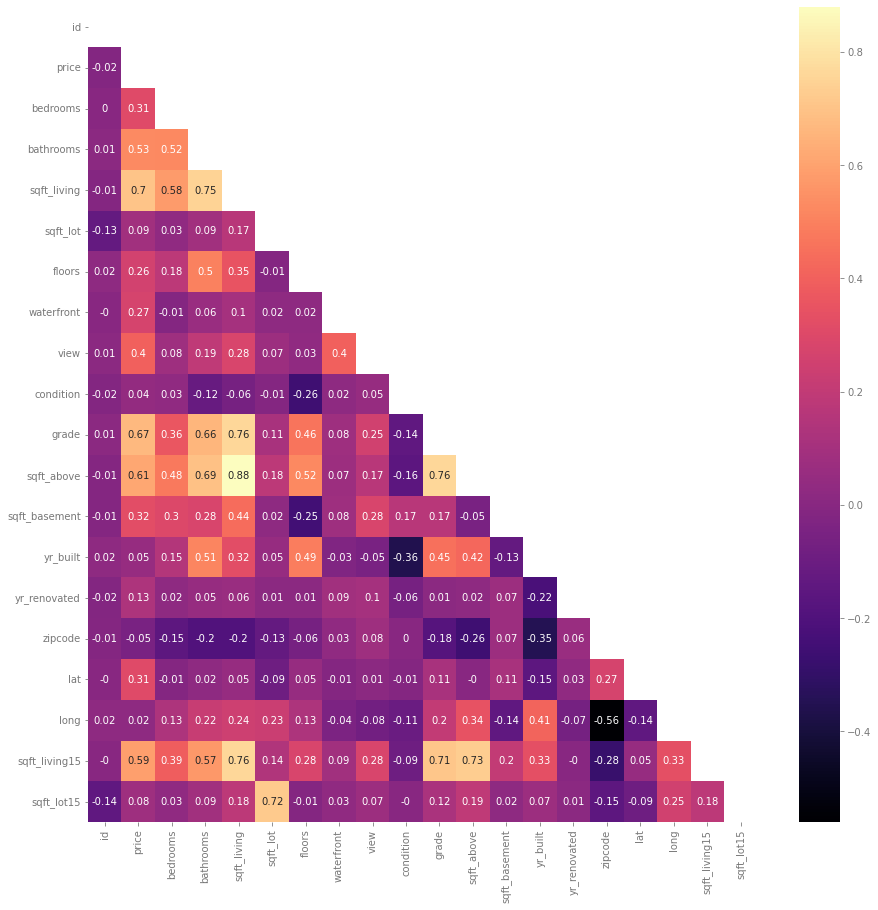

In [63]:
# Correlação de atributos numéricos
def calculate_correlation (data):

    #Definindo os parâmetros de style para o matplotlib
    rc_params = {'axes.edgecolor':'#787878', 
                 'axes.titlecolor':'#787878', 
                 'axes.labelcolor': '#787878', 
                 'axes.spines.top':False, 
                 'axes.spines.right': False, 
                 'xtick.color': '#787878', 
                 'ytick.color': '#787878',
                 'axes.titleweight': 'bold',
                 'axes.titlesize': 12,
                 'axes.titlepad': 12,
                 'figure.figsize':(15,15)
                 }

    correlation = data.corr(method='pearson').round(2)

    
    #setando os parâmetros no matplotlib
    with plt.rc_context(rc_params):

      #Instanciando a Figure e Axes
      fig, ax = plt.subplots()
      ax = np.zeros_like(correlation)
      ax[np.triu_indices_from(ax)] = True 
    
      #Criando o gráfico de countplot
      sns.heatmap(correlation,
                  mask=ax,
                  annot=True,
                  cmap="magma")

    return None

dcor = data[num_feature]

calculate_correlation(dcor)

In [74]:
#Armazenando as features
features = data.columns.to_list()

#Armazenando as informações das variáveis
data_var = Map_Var_DF(features = features, df = data)

data_var

,feature,Tipo,Categórico,Binário,Qtd var unico,Min,Max,% Qtd de Nulos
0,id,int64,0,0,21436,1000102,9900000190,0.0000
1,date,object,1,0,372,N/A,N/A,0.0000
2,price,float64,0,0,4028,75000.0,7700000.0,0.0000
3,bedrooms,int64,0,0,13,0,33,0.0000
4,bathrooms,float64,0,0,30,0.0,8.0,0.0000
5,sqft_living,int64,0,0,1038,290,13540,0.0000
6,sqft_lot,int64,0,0,9782,520,1651359,0.0000
7,floors,float64,0,0,6,1.0,3.5,0.0000
8,waterfront,int64,0,1,2,0,1,0.0000
9,view,int64,0,0,5,0,4,0.0000


# Dados Balanceados?

Este passo tem a finalidade de avarliarmos se os dados estão balanceados em relação a variável alvo (buy_decision)


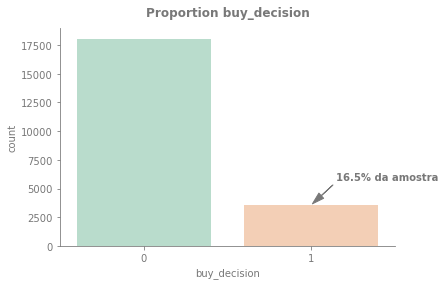

In [40]:
#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12,
             'axes.titlepad': 12
             }

#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a Figure e Axes
  fig, ax = plt.subplots()

  #Criando o gráfico de countplot
  sns.countplot(x = 'buy_decision', 
                data = data,
                ax = ax,
                palette = "Pastel2")
  
  #Exibindo o título
  ax.set_title("Proportion buy_decision")

  #Armazena o % da amostra
  percentual_default = round((data['buy_decision'].value_counts()[1] / data.shape[0])*100,2)

  #Criar uma informação no gráfico
  ax.annotate(str(percentual_default) + "% da amostra", 
              xy = (1, data['buy_decision'].value_counts()[1]), 
              xytext = (25,25), 
              color = "#787878",
              weight = 'bold', 
              textcoords='offset points',
              arrowprops=dict(color = '#787878',  shrink= 0.05, width = 0.01, headwidth = 7))

  #Exibindo o gráfico
  plt.show()

# Preparacao dos dados para treino 

In [75]:
#Armazenando as features binarias
bin_feature = data_var['feature'].loc[ (data_var['Tipo'] == 'O') & (data_var['Binário'] == 1) ].to_list()

#Armazenando as features categoricas
cat_feature = data_var['feature'].loc[ (data_var['Tipo'] == 'O') & (data_var['Binário'] == 0) ].to_list()

#Armazenando as features numéricas
num_feature = data_var['feature'].loc[ (data_var['Tipo'] == 'float64') | (data_var['Tipo'] == 'int64') ].to_list()

#Removendo as variaveis alvo ou variaveis diretamente relacionados e a variavel 'id'
num_feature.remove('buy_decision')
num_feature.remove('id')
num_feature.remove('price')
num_feature.remove('bad_choice')
num_feature.remove('profit')
num_feature.remove('sell_price')




In [76]:
#Removendo linhas com entradas vazias
data = data.dropna()

#Definindo os valores de X e y
X = data.drop(['id','buy_decision', 'sell_price', 'profit', 'price', 'bad_choice', 'date'], axis = 1)
y = data['buy_decision']

#Dividindo o dataset em treino e test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle = True, 
                                                    stratify = y,
                                                    random_state = 42)

In [77]:
#Instanciando o objeto RandomUnderSampler()
rus = RandomUnderSampler(random_state = 0)

# #Balanceando a amostra
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# #Transformando o array X em dataframe e y em série
X_train_rus = pd.DataFrame(X_train_rus, columns = X_train.columns)
y_train_rus = pd.Series(y_train_rus)


# Modelo de Machine Learning

Com as preparações dos dados, aplicaremos variados modelos de ML procurando o que melhor se adequa a este problema de acordo com uma métrica estabelecida

A métrica de avaliação escolhida para definir a melhor modelo foi a ROC_AUC.

Utilizaremos os seguintes modelos para ajuste e análise:

    Regressão Logística
    Random Forest
    SVC
    KNN
    XGBoost
    LighGBM

Utilizaremos uma validação cruzada para escolhermos o melhor modelo com base na métrica ROC_AUC.

In [78]:
#Instanciando os parâmetros do Kfold para Validação Cruzada
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [79]:
#Escalonando as variáveis numéricas
num_scaled = ColumnTransformer([("Padronizar", StandardScaler(), num_feature)],
                         remainder='passthrough')

Modelo de predição para variável 'buy_decision'

In [83]:
#Criando uma lista vazia para armazenar os valores das métricas e o nome do modelo
name_model = []
accuracy = []

#Instanaciando os modelos com os hiperparâmetros otimizados
model_rl = LogisticRegression(random_state = 42, max_iter=5000)

model_rf = RandomForestClassifier(random_state = 42)

model_svc = SVC(random_state = 42)

model_knn = KNeighborsClassifier()

model_xgb = XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric='logloss')

model_lgbm = LGBMClassifier(random_state = 42)

#Criando um loop para aplicar o cross_validation em cada modelo e armazenar o resultado
for model in [model_rl, model_rf, model_svc, model_knn, model_xgb, model_lgbm]:

  #Criando um pipeline com a padronização + modelo
  pipe = make_pipeline(model)

  #Aplicando o cross_validation para calcular o score
  score = cross_val_score(estimator = pipe,
                          X = X_train_rus,
                          y = y_train_rus,
                          scoring = 'roc_auc',
                          cv = k_fold)
  
  #Armazenando o nome do modelo
  name_model.append(model.__class__.__name__)

  #Armazenando o score do modelo
  accuracy.append(score.mean())

#Convertendo a estrutura de lista para um dataframe
df_model = pd.DataFrame(data = accuracy, 
                        index = name_model, 
                        columns = ['ROC_AUC'])

#Imprmindo a tabela de resultado
df_model

,ROC_AUC
LogisticRegression,0.642534
RandomForestClassifier,0.937322
SVC,0.572924
KNeighborsClassifier,0.717965
XGBClassifier,0.966801
LGBMClassifier,0.963170


O modelo que teve a melhor performance foi XGBClassifier.

# Otimizando os Hiperparâmetros

Utilizaremos o algoritmo GridSearchCV do Scikit-Learn para escolher o melhor conjunto de hiperparâmetros

Focaremos nos seguintes hiperparâmetros:

    eta;
    max_depth (C);
    min_child_weigh;
    gamma;
    colsample_bytree



In [55]:
#Definindo os passos da pipeline
pipe = make_pipeline(num_scaled, XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric='logloss') )

#Definindo os parâmetros para simulação do GridSearch
param_grid = {"xgbclassifier__eta": [0.05, 0.10, 0.20, 0.3, 0.5],
              "xgbclassifier__max_depth": [ 3, 4, 5, 6, 8, 12],
              "xgbclassifier__min_child_weight": [ 1, 3, 5 ],
              "xgbclassifier__gamma": [ 0.0, 0.1, 0.3 ],
              "xgbclassifier__colsample_bytree" : [ 0.4, 0.7, 1 ] }
             
             
                         

#Instanciando o GridSearch
clf = GridSearchCV(estimator = pipe,
                   param_grid = param_grid,
                   scoring = 'roc_auc',
                   n_jobs = -1,
                   cv = k_fold)

#Ajustando com base no X_train e y_train balanceado
clf.fit(X = X_train_rus, 
        y = y_train_rus)

#Imprimindo o melhor parâmetro
clf.best_params_

{'xgbclassifier__colsample_bytree': 1,
 'xgbclassifier__eta': 0.2,
 'xgbclassifier__gamma': 0.1,
 'xgbclassifier__max_depth': 12,
 'xgbclassifier__min_child_weight': 3}

In [48]:
#Imprimindo o score dos melhores hiperparâmetros
clf.best_score_

0.9798620283780004

In [81]:
#Importando a metrica ROC_AUC
from sklearn.metrics import roc_auc_score

#Treinando o modelo com os melhores parâmetros encontrados
model_xgb = XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric='logloss', colsample_bytree = 1,
                          eta = 0.2, gamma = 0.1, max_depth =  12, min_child_weight = 3).fit(X_train_rus, y_train_rus)

In [82]:
#Predizendo os valores para X_test
pred = model_xgb.predict(X_test)

#Calculando a ROC_AUC score para a predição feita
score = roc_auc_score (y_test, pred)
print(score)

0.9154256811614968


In [33]:
#Definindo os valores de X e y
X = data.drop(['id','buy_decision', 'sell_price', 'profit', 'price', 'bad_choice', 'date'], axis = 1)
y = data['price']

#Dividindo o dataset em treino e test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle = True,
                                                    random_state = 42)

#Instanciando o objeto RandomUnderSampler()
rus = RandomUnderSampler(random_state = 0)

# #Balanceando a amostra
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# #Transformando o array X em dataframe e y em série
X_train_rus = pd.DataFrame(X_train_rus, columns = X_train.columns)
y_train_rus = pd.Series(y_train_rus)



#Instanciando os parâmetros do Kfold para Validação Cruzada
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

#Escalonando as variáveis numéricas
num_scaled = ColumnTransformer([("Padronizar", StandardScaler(), num_feature)],
                         remainder='passthrough')



In [52]:
#Importando os modelos
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


#Criando uma lista vazia para armazenar os valores das métricas e o nome do modelo
name_model = []
accuracy = []

#Instanaciando os modelos com os hiperparâmetros otimizados
model_lr = LinearRegression()

model_rd = Ridge(random_state = 42)

model_mlp = MLPRegressor(random_state = 42, max_iter = 1000)

model_tr = DecisionTreeRegressor(random_state = 42)

model_knn = KNeighborsRegressor()

model_svr  = SVR()
 
model_rfr = RandomForestRegressor(random_state = 42)


#Criando um loop para aplicar o cross_validation em cada modelo e armazenar o resultado
for model in [model_lr, model_rd, model_mlp, model_tr, model_knn, model_svr, model_rfr]:

  #Criando um pipeline com a padronização + modelo
  pipe = make_pipeline(model)

  #Aplicando o cross_validation para calcular o score
  score = cross_val_score(estimator = pipe,
                          X = X_train_rus,
                          y = y_train_rus,
                          scoring = 'r2',
                          cv = k_fold)
  
  #Armazenando o nome do modelo
  name_model.append(model.__class__.__name__)

  #Armazenando o score do modelo
  accuracy.append(score.mean())

#Convertendo a estrutura de lista para um dataframe
df_model = pd.DataFrame(data = accuracy, 
                        index = name_model, 
                        columns = ['R2'])

#Imprmindo a tabela de resultado
df_model

,R2
LinearRegression,0.810201
Ridge,0.810201
MLPRegressor,0.803774
DecisionTreeRegressor,0.830751
KNeighborsRegressor,0.679177
SVR,-0.056769
RandomForestRegressor,0.920969


In [53]:
#Definindo os passos da pipeline
pipe = make_pipeline(num_scaled,RandomForestRegressor(random_state = 42) )

#Definindo os parâmetros para simulação do GridSearch
param_grid = {"randomforestregressor__max_depth": [15, 20, 40 ],
              "randomforestregressor__min_samples_split": [2, 5],
              "randomforestregressor__n_estimators": [ 150, 200, 300 ]}
             
             
                         

#Instanciando o GridSearch
clf = GridSearchCV(estimator = pipe,
                   param_grid = param_grid,
                   scoring = 'r2',
                   n_jobs = -1,
                   cv = k_fold)

#Ajustando com base no X_train e y_train balanceado
clf.fit(X = X_train_rus, 
        y = y_train_rus)

#Imprimindo o melhor parâmetro
clf.best_params_

{'randomforestregressor__max_depth': 20,
 'randomforestregressor__max_features': None,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 200}

In [54]:
#Imprimindo o score dos melhores hiperparâmetros
clf.best_score_

0.922002296548141

In [35]:
#Importando a metrica R2
from sklearn.metrics import r2_score

#Treinando o modelo com os melhores parâmetros encontrados
model_rfr = RandomForestRegressor(random_state = 42, max_depth = 20, min_samples_split = 2,
                                  n_estimators = 200 ).fit(X_train_rus, y_train_rus)

#Predizendo os valores para X_test
pred = model_rfr.predict(X_test)

#Calculando a R2 score para a predição feita
score = r2_score (y_test, pred)
print(score)



0.8790973552985744
